Importing necessary Libaries

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

From Keras importing dataset Mnist

In [2]:
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


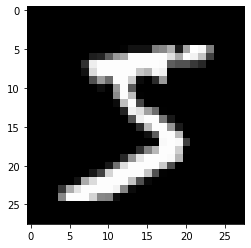

In [5]:
print(y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()


In [6]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [7]:
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizer)

#model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train our model!
h = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

ValueError: ('Could not interpret optimizer identifier:', <keras.optimizers.Adam object at 0x00000239EA8E2FC8>)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

In [ ]:
model.save('model.h5')

In [ ]:
plt.imshow(tf.reshape(X_test[12], [28, 28]), cmap='gray')
# Pass through network...
print(np.argmax(model(tf.expand_dims(X_test[12], 0))))

In [ ]:
#C:/Users/abc/Documents/Mtech Docs/SEM 2